In [48]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: /root/mambaforge/etc/jupyter
    - Validating...
      voila 0.4.0 OK


In [49]:
! [ -e /content ]` && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/bin/bash: -c: line 0: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [50]:
#hide
from fastbook import *
from fastai.vision.widgets import *


In [51]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [52]:
btn_upload = widgets.FileUpload()

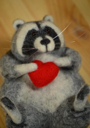

Output()

In [53]:
out_pl = widgets.Output()
out_pl.clear_output()
dest = 'images/raccoon.jpg'
im = Image.open(dest)
with out_pl: display(im.to_thumb(128,128))
out_pl

In [54]:
lbl_pred = widgets.Label()
lbl_pred.value = 'No value yet'

btn_run = widgets.Button(description='Classify')

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


btn_run.on_click(on_click_classify)

In [56]:
VBox([widgets.Label('Select your animal!'), 
      btn_upload, btn_run, out_pl, lbl_pred])